##Setting up and Importing libs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.8 MB/s eta 0:00:00


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import scipy
import scipy.stats as stats
import shap

import optuna
from optuna.samplers import TPESampler

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/Loan_test.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/Loan_train.csv')
original_data = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/original.csv')

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
train_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.00,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.00,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.00,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.00,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.00,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.00,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.00,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.00,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.00,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
original_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.00,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.00,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.00,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.00,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.00,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.00,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.00,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.00,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.00,PERSONAL,B,15000,11.48,0,0.10,N,26


##Handle Original Data (Omitted)

In [ ]:
# train_data = pd.concat([train_data.drop(['id'], axis=1), original_data],ignore_index=True)
# train_data

##EDA

###Handling Missing data

In [ ]:
train_data.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
train_data.dropna(inplace =True)
train_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.00,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.00,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.00,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.00,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.00,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.00,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.00,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.00,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.00,EDUCATION,A,5000,8.90,0.17,N,3,0


###Duplicates

In [ ]:
train_data.drop_duplicates(inplace = True)
train_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.00,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.00,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.00,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.00,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.00,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.00,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.00,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.00,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.00,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

### Distribution of Target

<Axes: xlabel='loan_status', ylabel='count'>

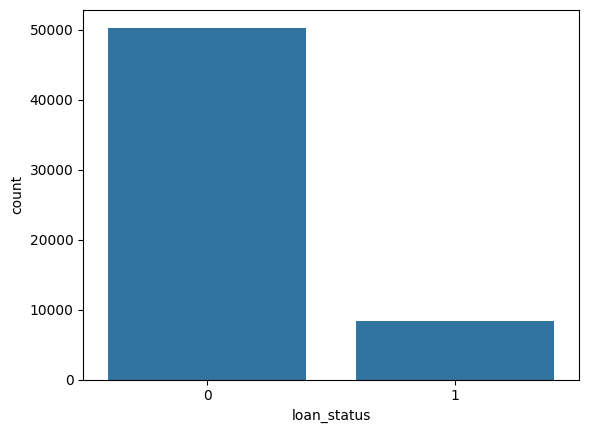

In [ ]:
sns.countplot(data= train_data, x = 'loan_status')

###Heatmap

In [ ]:
# plt.figure(figsize=(25,10))
# sns.heatmap((train_data.drop(columns='loan_status')).corr(),annot=True)
# plt.show()

ValueError: could not convert string to float: 'RENT'

<Figure size 2500x1000 with 0 Axes>

In [ ]:
# from sklearn.feature_selection import mutual_info_classif

# y_sampled = train_data.loan_status
# mutual_df = train_data.drop(['loan_status'], axis=1)

# mutual_info = mutual_info_classif(mutual_df, y_sampled, random_state=42)

# mutual_info = pd.Series(mutual_info)
# mutual_info.index = mutual_df.columns
# mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
# mutual_info.style.background_gradient("cool")

##Data preprocessing

###Feature Engineering and Selection

In [ ]:
#cb_person_default_on_fileseems useless?
#loan grade and income seem to affect the result the most

###Label Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Categorical_cols = ['person_home_ownership','loan_intent','loan_grade', 'cb_person_default_on_file']
for i in Categorical_cols:
  train_data[i] = label_encoder.fit_transform(train_data[i])
train_data[Categorical_cols]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,3,1,1,0
1,2,3,2,0
2,2,4,0,0
3,3,5,1,0
4,3,3,0,0
...,...,...,...,...
58640,0,1,3,1
58641,3,3,2,0
58642,3,1,3,0
58643,3,1,0,0


In [ ]:
for i in Categorical_cols:
  test_data[i] = label_encoder.fit_transform(test_data[i])
test_data[Categorical_cols]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,3,2,5,0
1,0,4,2,1
2,3,5,4,1
3,3,0,0,0
4,0,2,3,1
...,...,...,...,...
39093,0,0,1,0
39094,0,1,0,0
39095,0,4,0,0
39096,0,4,3,1


##Modeling

###Finding the baseline model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
lsvc = LinearSVC()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
nb = GaussianNB()
base_xgb = XGBClassifier()
lgbm = LGBMClassifier()
cb = CatBoostClassifier()



In [ ]:
cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)


In [ ]:
X = train_data.drop(columns='loan_status')
X

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,37,35000,3,0.00,1,1,6000,11.49,0.17,0,14
1,1,22,56000,2,6.00,3,2,4000,13.35,0.07,0,2
2,2,29,28800,2,8.00,4,0,6000,8.90,0.21,0,10
3,3,30,70000,3,14.00,5,1,12000,11.11,0.17,0,5
4,4,22,60000,3,2.00,3,0,6000,6.92,0.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,0,5.00,1,3,25000,15.95,0.21,1,10
58641,58641,28,28800,3,0.00,3,2,10000,12.73,0.35,0,8
58642,58642,23,44000,3,7.00,1,3,6800,16.00,0.15,0,2
58643,58643,22,30000,3,2.00,1,0,5000,8.90,0.17,0,3


In [ ]:
Y = train_data['loan_status']
Y

,loan_status
0,0
1,0
2,0
3,0
4,0
...,...
58640,0
58641,1
58642,1
58643,0


In [ ]:
from statistics import mean, stdev
from sklearn.metrics import roc_auc_score

def compute(model):
    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train)
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    max_val_score = max(lst_accu_stratified)
    min_val_score = min(lst_accu_stratified)
    mean_val_score = mean(lst_accu_stratified)
    std = stdev(lst_accu_stratified)

    hashmap[str(model)]=([mean_val_score, max_val_score, min_val_score, std])

In [ ]:
clf = [lgbm, base_xgb,cb]
hashmap = {}
for i in clf:
  compute(i)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4317405	total: 90.2ms	remaining: 18s
5:	learn: 0.3993708	total: 104ms	remaining: 17.1s
6:	learn: 0.3716576	total: 116ms	remaining: 16.4s
7:	learn: 0.3496635	total: 129ms	remaining: 16.1s
8:	learn: 0.3292013	total: 143ms	remaining: 15.7s
9:	learn: 0.3116192	total: 156ms	remaining: 15.5s
10:	learn: 0.2960843	total: 170ms	remaining: 15.3s
11:	learn: 0.2821889	total: 183ms	remaining: 15.1s
12:	learn: 0.2703086	total: 203ms	remaining: 15.4s
13:	learn: 0.2607640	total: 217ms	remaining: 15.3s
14:	learn: 0.2520697	total: 229ms	remaining: 15.1s
15:	learn: 0.2444106	total: 244ms	remaining: 15s
16:	learn: 0.2380460	total: 258ms	remaining: 14.9s
17:	learn: 0.2326285	total: 271ms	remaining: 14.8s
18:	learn: 0.2275273	total: 284ms	remaining: 14.7s
19:	learn: 0.2232732	total: 297ms	remaining: 14.6s
20:	learn: 0.2193267	total: 311ms	remaining: 14.5s
21:	learn: 0.2154596	total: 324ms	remaining: 14.4s
22:	learn: 0.2120203	total: 337ms	remain

In [ ]:
score = pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['mean_val_score', 'max_val_score', 'min_val_score', 'std']
score = score.sort_values('mean_val_score',ascending=False)
score

,mean_val_score,max_val_score,min_val_score,std
LGBMClassifier(),0.96,0.96,0.95,0.00
<catboost.core.CatBoostClassifier object at 0x7b662550d3f0>,0.96,0.96,0.95,0.01
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...)",0.95,0.96,0.95,0.00


###Feature importancce

In [ ]:
from matplotlib import pyplot

def checking_feature_imp(model):
  for i,v in enumerate (model.feature_importances_):
    print(f'{X.columns[i]}: {v: 5f}')
  pyplot.bar([x for x in range(1, len(model.feature_importances_)+1)], model.feature_importances_)
  pyplot.show()

LGBMClassifier()
id:  251.000000
person_age:  147.000000
person_income:  916.000000
person_home_ownership:  195.000000
person_emp_length:  177.000000
loan_intent:  343.000000
loan_grade:  83.000000
loan_amnt:  228.000000
loan_int_rate:  363.000000
loan_percent_income:  205.000000
cb_person_default_on_file:  11.000000
cb_person_cred_hist_length:  81.000000


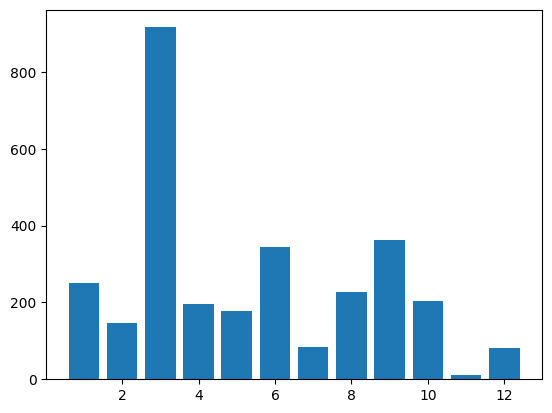


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
id:  0.010204
person_age:  0.012976
person_income:  0.033712
person_home_ownership:  0.192586
person_emp_length:  0.024536
loan_intent:  0.056360
loan_grade:  0.468461
loan_amnt:  0.011525
loan_int_rate:  0.019889
loan_percent_income:  0.150

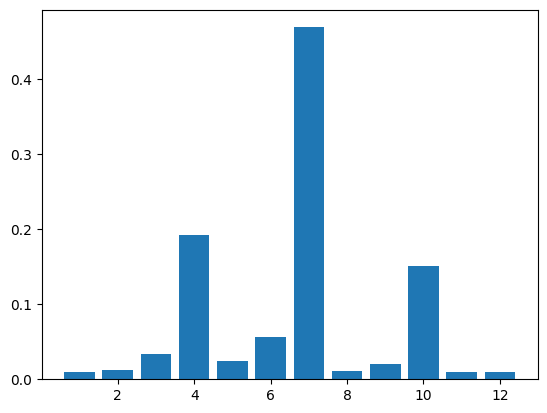


id:  3.367906
person_age:  2.909221
person_income:  18.943111
person_home_ownership:  14.696038
person_emp_length:  4.380291
loan_intent:  11.852351
loan_grade:  13.405571
loan_amnt:  3.339692
loan_int_rate:  8.037712
loan_percent_income:  17.338621
cb_person_default_on_file:  0.449818
cb_person_cred_hist_length:  1.279668


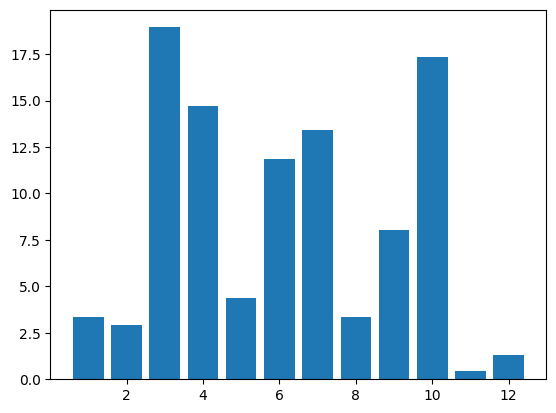

In [ ]:
well_performed_clf = [lgbm, base_xgb, cb]
for each_clf in well_performed_clf:
  print(each_clf)
  checking_feature_imp(each_clf)
  print()

###Tuning baseline model with Optuna

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

####LGBM

In [ ]:
from lightgbm import log_evaluation, early_stopping
def objective(trial):
    # Define the hyperparameter search space
    param = {
        'objective': 'multiclass',  # For multi-class classification
        'metric': 'multi_logloss',  # Metric for evaluation in multi-class classification
        'num_class': 3,
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 400)
    }

    # Create and train the LightGBM model
    model = LGBMClassifier(**param)

    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)],  callbacks=[early_stopping(stopping_rounds=50, verbose=False)])
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    mean_val_score = mean(lst_accu_stratified)

    # model.fit(X_train, Y_train)
    # y_pred = model.predict(X_test)
    # mean_val_score = accuracy_score(Y_test, y_pred)

    return mean_val_score

In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2024-10-14 08:06:34,188] A new study created in memory with name: no-name-12060860-758c-4fab-947f-5cfee9226361
[I 2024-10-14 08:06:55,890] Trial 0 finished with value: 0.9719858317800737 and parameters: {'lambda_l1': 6.404640319336126, 'lambda_l2': 6.121342796805574, 'num_leaves': 216, 'feature_fraction': 0.4463662173702617, 'bagging_fraction': 0.8262900073771122, 'bagging_freq': 1, 'min_child_samples': 82, 'learning_rate': 0.08360680168517949, 'n_estimators': 191}. Best is trial 0 with value: 0.9719858317800737.
[I 2024-10-14 08:07:25,291] Trial 1 finished with value: 0.9802714335999442 and parameters: {'lambda_l1': 2.6250154010904994, 'lambda_l2': 1.2914907276938499, 'num_leaves': 296, 'feature_fraction': 0.5392127761027942, 'bagging_fraction': 0.4498778334097292, 'bagging_freq': 5, 'min_child_samples': 29, 'learning_rate': 0.084128441619177, 'n_estimators': 194}. Best is trial 1 with value: 0.9802714335999442.
[I 2024-10-14 08:08:13,446] Trial 2 finished with value: 0.97831064086

Best hyperparameters: {'lambda_l1': 0.43011707900635354, 'lambda_l2': 0.9285430328959461, 'num_leaves': 298, 'feature_fraction': 0.43131642678388, 'bagging_fraction': 0.9826163260141136, 'bagging_freq': 5, 'min_child_samples': 71, 'learning_rate': 0.09996736376132556, 'n_estimators': 239}
Best accuracy:  0.9906126198472784


In [ ]:
# Best accuracy:  0.9906126198472784
best_params_lgbm = {'lambda_l1': 0.43011707900635354, 'lambda_l2': 0.9285430328959461, 'num_leaves': 298, 'feature_fraction': 0.43131642678388, 'bagging_fraction': 0.9826163260141136, 'bagging_freq': 5, 'min_child_samples': 71, 'learning_rate': 0.09996736376132556, 'n_estimators': 239}
optimized_lgbm = LGBMClassifier(**best_params_lgbm)

####XGB

In [ ]:
def objective(trial):
    # Define the hyperparameter search space
    param = {
        'objective': 'multi:softmax',  # For multi-class classification
        'eval_metric': 'mlogloss',     # Metric for evaluation in multi-class classification
        'num_class': 3,      # Replace with the number of classes in your dataset
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 10.0)
    }

    # Create and train the XGBoost model
    model = XGBClassifier(**param)
    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train)
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    mean_val_score = mean(lst_accu_stratified)
    # model.fit(X_train, Y_train)
    # y_pred = model.predict(X_test)
    # mean_val_score = accuracy_score(Y_test, y_pred)

    return mean_val_score

In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2024-10-14 09:05:40,496] A new study created in memory with name: no-name-7d0b0af3-d064-4859-861a-d8066e16552f
[I 2024-10-14 09:06:22,083] Trial 0 finished with value: 0.9815749335136768 and parameters: {'lambda': 3.513512828683183, 'alpha': 2.2290134751126, 'colsample_bytree': 0.6519371326286962, 'subsample': 0.9765923866233802, 'learning_rate': 0.06606043126732894, 'n_estimators': 403, 'max_depth': 7, 'min_child_weight': 2, 'gamma': 0.06567734100615548}. Best is trial 0 with value: 0.9815749335136768.
[I 2024-10-14 09:06:50,275] Trial 1 finished with value: 0.9412619321044928 and parameters: {'lambda': 2.7433580387744736, 'alpha': 9.03426787978103, 'colsample_bytree': 0.9829544721997087, 'subsample': 0.5749142034876706, 'learning_rate': 0.0427190679693458, 'n_estimators': 433, 'max_depth': 9, 'min_child_weight': 10, 'gamma': 6.107069420999013}. Best is trial 0 with value: 0.9815749335136768.
[I 2024-10-14 09:07:05,917] Trial 2 finished with value: 0.9211699395106113 and parameters

Best hyperparameters: {'lambda': 0.988645389192377, 'alpha': 0.03830731723652736, 'colsample_bytree': 0.4376555199623422, 'subsample': 0.9785763087647484, 'learning_rate': 0.09700190995462803, 'n_estimators': 481, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.010150732391070172}
Best accuracy:  0.9907392409320572


In [ ]:
# Best accuracy:  0.9907392409320572
best_param_xgb = {'lambda': 0.988645389192377, 'alpha': 0.03830731723652736, 'colsample_bytree': 0.4376555199623422, 'subsample': 0.9785763087647484, 'learning_rate': 0.09700190995462803, 'n_estimators': 481, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.010150732391070172}
optimized_xgb = XGBClassifier(**best_param_xgb)

####CatBoost

In [ ]:
def objective(trial):
    # Define the hyperparameter search space for CatBoost
    param = {
        'objective': 'Logloss',  # For binary classification
        'eval_metric': 'AUC',  # AUC is suitable for binary classification
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 10.0),
        'verbose': 0  # Suppress output
    }

    # Create and train the CatBoost model
    model = CatBoostClassifier(**param)

    lst_accu_stratified = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[test_index]
        model.fit(X_train, Y_train, eval_set=(X_val, Y_val), verbose=False)
        y_pred_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
        lst_accu_stratified.append(auc_score)

    mean_val_score = mean(lst_accu_stratified)

    return mean_val_score

In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=100)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)
print('Best accuracy: ', study.best_value)

[I 2024-10-14 09:54:45,093] A new study created in memory with name: no-name-76387729-f77d-4b50-b112-983da03d53be
[I 2024-10-14 09:55:31,759] Trial 0 finished with value: 0.9725747026286953 and parameters: {'iterations': 460, 'depth': 7, 'learning_rate': 0.06891767073289151, 'random_strength': 4.095909950257007, 'bagging_temperature': 0.058009813951322764, 'l2_leaf_reg': 2.2503419629819823, 'border_count': 86, 'scale_pos_weight': 3.0018414348851197}. Best is trial 0 with value: 0.9725747026286953.
[I 2024-10-14 09:56:19,966] Trial 1 finished with value: 0.9732219621880281 and parameters: {'iterations': 463, 'depth': 7, 'learning_rate': 0.052969481652442856, 'random_strength': 1.1936831170925788, 'bagging_temperature': 0.797639935399857, 'l2_leaf_reg': 2.1547991978690932, 'border_count': 173, 'scale_pos_weight': 8.99211623580078}. Best is trial 1 with value: 0.9732219621880281.
[I 2024-10-14 09:56:29,418] Trial 2 finished with value: 0.9330972556648174 and parameters: {'iterations': 139

Best hyperparameters: {'iterations': 365, 'depth': 10, 'learning_rate': 0.06652909915486094, 'random_strength': 0.6956040076464232, 'bagging_temperature': 0.7892951724733448, 'l2_leaf_reg': 2.845827979512297, 'border_count': 238, 'scale_pos_weight': 7.727289117335662}
Best accuracy:  0.9858258212523067


In [ ]:
#Best accuracy:  0.9858258212523067
best_param_cat = {'iterations': 365, 'depth': 10, 'learning_rate': 0.06652909915486094, 'random_strength': 0.6956040076464232, 'bagging_temperature': 0.7892951724733448, 'l2_leaf_reg': 2.845827979512297, 'border_count': 238, 'scale_pos_weight': 7.727289117335662}
optimized_cat = CatBoostClassifier(**best_param_cat)

##Ensemble Learning

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

###Voting Method

In [ ]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

ensemble_models = [('lgb', optimized_lgbm),
   ('xgb', optimized_xgb)]

voting_model = VotingClassifier(estimators= ensemble_models, voting= 'soft')
voting_model.fit(X_train, Y_train)

[LightGBM] [Warning] feature_fraction is set=0.43131642678388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43131642678388
[LightGBM] [Warning] lambda_l2 is set=0.9285430328959461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9285430328959461
[LightGBM] [Warning] lambda_l1 is set=0.43011707900635354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43011707900635354
[LightGBM] [Warning] bagging_fraction is set=0.9826163260141136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9826163260141136
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.43131642678388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43131642678388
[LightGBM] [Warning] lambda_l2 is set=0.9285430328959461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9285430328959461
[LightGBM] [Warning] lambda_l1 is set=0.43

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9826163260141136,
                                             bagging_freq=5,
                                             feature_fraction=0.43131642678388,
                                             lambda_l1=0.43011707900635354,
                                             lambda_l2=0.9285430328959461,
                                             learning_rate=0.09996736376132556,
                                             min_child_samples=71,
                                             n_estimators=239,
                                             num_leaves=298)),
                             ('xgb',
                              XGBClassifier(alpha=0.03830731723652736,
                                            base_score=None, boo...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            lambda=0.988645389192377,
                                            learning_rate=0.09700190995462803,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=481, n_jobs=None, ...))],
                 voting='soft')

In [ ]:
y_pred_proba = voting_model.predict_proba(X_test)
auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
print(auc_score)

[LightGBM] [Warning] feature_fraction is set=0.43131642678388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43131642678388
[LightGBM] [Warning] lambda_l2 is set=0.9285430328959461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9285430328959461
[LightGBM] [Warning] lambda_l1 is set=0.43011707900635354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43011707900635354
[LightGBM] [Warning] bagging_fraction is set=0.9826163260141136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9826163260141136
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.9570680462963276


###Stacking Method

In [ ]:
from sklearn.ensemble import StackingClassifier
final_estimator = LogisticRegression()

estimators = [
    ('lgb', optimized_lgbm),
    ('xgb', optimized_xgb)]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Train the stacking model
stacking_model.fit(X_train, Y_train)

# Evaluate the model
y_pred_proba = stacking_model.predict_proba(X_test)
auc_score = roc_auc_score(Y_test, y_pred_proba[:, 1])
print(auc_score)


[LightGBM] [Warning] feature_fraction is set=0.43131642678388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43131642678388
[LightGBM] [Warning] lambda_l2 is set=0.9285430328959461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9285430328959461
[LightGBM] [Warning] lambda_l1 is set=0.43011707900635354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43011707900635354
[LightGBM] [Warning] bagging_fraction is set=0.9826163260141136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9826163260141136
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.43131642678388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43131642678388
[LightGBM] [Warning] lambda_l2 is set=0.9285430328959461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9285430328959461
[LightGBM] [Warning] lambda_l1 is set=0.43

#Final Solutions

In [ ]:
solution = stacking_model.predict(test_data)
solution

[LightGBM] [Warning] feature_fraction is set=0.43131642678388, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43131642678388
[LightGBM] [Warning] lambda_l2 is set=0.9285430328959461, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9285430328959461
[LightGBM] [Warning] lambda_l1 is set=0.43011707900635354, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.43011707900635354
[LightGBM] [Warning] bagging_fraction is set=0.9826163260141136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9826163260141136
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/Data Science/Kaggle Competitions/Classification/sample_submission.csv')
sample['loan_status'] = solution
sample

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


In [1]:
bruh = label_encoder.inverse_transform(solution)
bruh = pd.DataFrame(bruh)
bruh

NameError: name 'label_encoder' is not defined

In [ ]:
from google.colab import files

sample.to_csv('stacking_without_original_with_right_metric.csv', index=False)
files.download('stacking_without_original_with_right_metric.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>